In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [256]:
df1 = pd.read_csv('letter-ngrams/ngrams1.csv').set_index('1-gram', drop=True)

df2 = pd.read_csv('letter-ngrams/ngrams2.csv').set_index('2-gram', drop=True)
col = df2.columns
print(col)
ngrams2_any = df2['*/*']
ngrams2 = df2.T[col.str.contains('\*/') & (~ col.str.contains('-')) & (col != '*/*')].T
# sort by total occurance
sort = np.argsort(ngrams2.sum(axis = 1))[::-1]
ngrams2 = ngrams2.iloc[sort]
# normalize 
ngrams2 = (ngrams2.T /ngrams2.sum(axis = 1)).T
ngrams2.head()

Index(['*/*', '2/*', '3/*', '4/*', '5/*', '6/*', '7/*', '8/*', '9/*', '2/1:2',
       '3/1:2', '3/2:3', '4/1:2', '4/2:3', '4/3:4', '5/1:2', '5/2:3', '5/3:4',
       '5/4:5', '6/1:2', '6/2:3', '6/3:4', '6/4:5', '6/5:6', '7/1:2', '7/2:3',
       '7/3:4', '7/4:5', '7/5:6', '7/6:7', '8/1:2', '8/2:3', '8/3:4', '8/4:5',
       '8/5:6', '8/6:7', '8/7:8', '9/1:2', '9/2:3', '9/3:4', '9/4:5', '9/5:6',
       '9/6:7', '9/7:8', '9/8:9', '*/1:2', '*/2:3', '*/3:4', '*/4:5', '*/5:6',
       '*/6:7', '*/7:8', '*/8:9', '*/9:10', '*/-9:-8', '*/-8:-7', '*/-7:-6',
       '*/-6:-5', '*/-5:-4', '*/-4:-3', '*/-3:-2', '*/-2:-1'],
      dtype='object')


,*/1:2,*/2:3,*/3:4,*/4:5,*/5:6,*/6:7,*/7:8,*/8:9,*/9:10
2-gram,,,,,,,,,
TH,0.820110,0.019406,0.096614,0.039706,0.013875,0.004316,0.002795,0.001776,0.001402
HE,0.105263,0.796747,0.025079,0.022111,0.028597,0.010270,0.006059,0.003235,0.002639
IN,0.410280,0.078165,0.083950,0.094611,0.139948,0.079286,0.065397,0.032951,0.015412
ER,0.005654,0.209537,0.120368,0.283827,0.197294,0.091783,0.059234,0.025170,0.007132
AN,0.521958,0.144534,0.108898,0.061997,0.052418,0.033754,0.040724,0.023755,0.011962


In [257]:
from decrypt import Decrypt

In [283]:
s = """Zvd zvpvyb lzvdc imcq dktat qkt pvmzysab ptqdttz qkt jhsccgjsh
szy omszqme yvesgz gc cgqmsqty. Evcq utth qksq trwtagetzqsh
cdgqjk ctqqgznc szy wvgzqta atsygznc sat vz qkgc cgyt. Pmq cvet
dvmhy qkgzl qkt pvmzysab ztsata, vqktac dvmhy qkgzl gq usaqkta,
szy eszb dvmhy watuta zvq qv qkgzl spvmq gq. Gz usjq, qkt esqqta
gc vu ftab hgqqht gewvaqszjt gz wasjqgjt. Qkgc gc ptjsmct vu qkt
geetzct yguutatzjt gz cjsht ptqdttz qkgznc uva dkgjk
omszqme-etjkszgjsh ytcjagwqgvz gc zmetagjshhb tcctzqgsh szy qkvct
vaygagzsaghb wtajtwqgpht pb kmesz ptgznc. Ztftaqkthtcc, qkt
evfspghgqb vu qkt pvmzysab gc vu vzhb swwavrgesqt fshgygqb;
ytevzcqasqgvzc vu gq ytwtzy vz ztnhtjqgzn zmeptac dkgjk sat
ceshh, pmq zvq xtav, dkgjk egnkq qtzy qv xtav uva gzugzgqthb
hsant cbcqtec, pmq sat vzhb ftab ceshh uva atsh ugzgqt cbcqtec.
S qktvab uvmzyty gz qkgc dsb vz sanmetzqc vu eszgutcqhb
swwavrgesqt jksasjqta, kvdtfta nvvy qkt swwavrgesqgvz, gc cmathb
vu wavfgcgvzsh zsqmat. Gq cttec htngqgesqt qv cwtjmhsqt vz kvd
qkt qktvab egnkq tfvhft.  Pmq vu jvmact zv vzt gc vphgnty qv ivgz
gz cmjk cwtjmhsqgvz.
                                                   Ivkz Pthh""".lower()
for symb in ';., \n-':
    s = s.replace(symb,' ')

# my_df = pd.DataFrame(index = ngrams2.columns)
from collections import defaultdict
my_df = {k:defaultdict(int) for k in ngrams2.columns}

for word in s.split():
    n = len(word)
    if n > 10:
        continue
    for i in range(n-1):
        key = ''
        two_gram = word[i:i+2]
        key = '*/{}:{}'.format(i+1, i+2)
        my_df[key][two_gram] += 1
    
my_df = pd.DataFrame(my_df)
my_df
# axis0 = 2gram, axis1 = pos
sort = np.argsort(my_df.sum(axis = 1))[::-1]
my_df = my_df.iloc[sort]

In [290]:
#normalize 
my_df = (my_df.T/my_df.sum(axis = 1)).T
my_df.head()

,*/1:2,*/2:3,*/3:4,*/4:5,*/5:6,*/6:7,*/7:8,*/8:9,*/9:10
qk,0.909091,0.045455,NaN,0.045455,NaN,NaN,NaN,NaN,NaN
gz,0.315789,0.052632,0.368421,0.052632,0.157895,NaN,NaN,0.052632,NaN
ta,NaN,0.266667,0.066667,0.066667,0.333333,0.200000,NaN,0.066667,NaN
kt,NaN,0.857143,0.071429,NaN,0.071429,NaN,NaN,NaN,NaN
gq,0.333333,0.166667,0.083333,0.166667,NaN,0.166667,NaN,0.083333,NaN


In [268]:
# my_df[my_df.index.str[0] == 't']# .head()

In [270]:
ngrams2.head()#[ngrams2.index.str[0] == 'H'].head()

,*/1:2,*/2:3,*/3:4,*/4:5,*/5:6,*/6:7,*/7:8,*/8:9,*/9:10
2-gram,,,,,,,,,
TH,0.820110,0.019406,0.096614,0.039706,0.013875,0.004316,0.002795,0.001776,0.001402
HE,0.105263,0.796747,0.025079,0.022111,0.028597,0.010270,0.006059,0.003235,0.002639
IN,0.410280,0.078165,0.083950,0.094611,0.139948,0.079286,0.065397,0.032951,0.015412
ER,0.005654,0.209537,0.120368,0.283827,0.197294,0.091783,0.059234,0.025170,0.007132
AN,0.521958,0.144534,0.108898,0.061997,0.052418,0.033754,0.040724,0.023755,0.011962


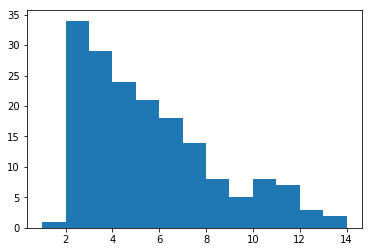

<Container object of 13 artists>

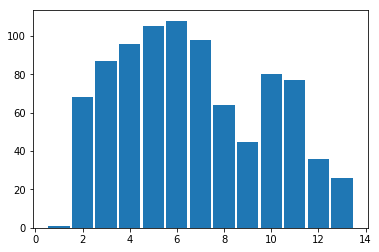

In [234]:
word_lengths = pd.Series(s.split()).apply(len)

h,bins, _ = plt.hist(word_lengths,bins = np.max(word_lengths)-1 )
plt.show()
# h*np.arange(np.max(word_lengths)-1)
plt.bar(bins[:-1], h*np.arange(1, np.max(word_lengths)), width = 0.9)

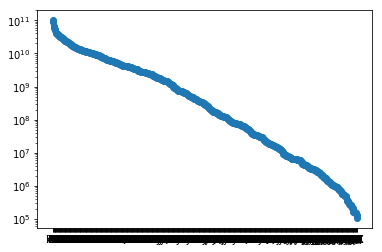

In [49]:
fig,ax =plt.subplots(1)
x, y = df2['2-gram'], df2['*/*']

sort = np.argsort(y)
x_temp = np.arange(x.size)
ax.scatter(x_temp,y)
ax.set_xticks(x_temp)
ax.set_xticklabels(x)
1
ax.set_yscale('log')

In [15]:
? plt.bar


In [10]:
df

,1-gram,*/*,1/*,2/*,3/*,4/*,5/*,6/*,7/*,8/*,...,*/9:9,*/-9:-9,*/-8:-8,*/-7:-7,*/-6:-6,*/-5:-5,*/-4:-4,*/-3:-3,*/-2:-2,*/-1:-1
0,E,445155370175,155009877,13152909655,71369953109,55076975765,51554070384,51988144305,56480782707,46294103377,...,11828736035,8494759088,14408255416,19026713066,30711710475,32717792363,28242806207,54491441855,97010506723,149765385042
1,T,330535289102,144097590,29023735343,68291190498,49364971323,31556644705,25865275019,29257353471,24521039280,...,8272108339,4176056288,6727233952,10550955147,15403397937,29530699234,63054875533,78715710116,51047126710,66727951442
2,A,286527429118,15310087895,12842459208,49188457778,37099746963,29210932177,25835260549,30977583657,26541380250,...,5137562358,6170922529,8618400620,14050117752,19480089439,35531334979,32158006494,75910330051,66338884604,20969421416
3,O,272276534337,127592144,63229701187,26500925239,30571860827,26270606556,24100790835,23087143922,20837992767,...,5194799665,6217371767,10304065823,12713593590,16934567079,21717622103,29295124394,48196679093,88767109164,31070107496
4,I,269731642485,3884828634,33472540786,9882160182,24650626888,24785796809,23135618811,29567453552,31151257081,...,7694483847,6197132824,8818992946,12430992022,18226975320,26786405316,33864693872,86796277358,62488710940,5594196764
5,N,257770795264,125421809,25898507931,37862653412,21158896322,18600828973,22490740540,28147603992,26879672296,...,10082729431,4993697979,7712916145,9301051358,12141936740,16545907443,19981096415,32316865244,78220210927,69252107252
6,S,232082812755,569891879,16357815785,18101829262,24621145666,29603336599,28125514856,30647690707,25334400879,...,7714800502,6717111996,8919663973,11773279969,17692297764,20001736132,23536329268,14617137889,26578873922,95977537953
7,R,223767519675,97228768,3994359574,15956631177,21619305373,31615481322,30131929328,34165684812,27975645919,...,2981039594,6591750596,10453646864,16284672797,21338360495,23639641355,28917427131,25487257788,39338770495,43881791800
8,H,180074687596,72827269,4377150115,68014677341,37466787942,25713192996,12263174810,12191134782,7087197272,...,915629453,1793247718,2495301509,5540076762,6991292269,8484556670,26639215939,41507472138,64580544822,20172047346
9,L,144998552911,117220317,755108896,6587954155,21070584705,21810917778,21105134396,20105987977,16610492942,...,4005788069,1868810555,3865645341,7720081317,12254601536,14243478576,22066343691,16162407662,39055317004,25770778363
